In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import tensorflow

In [3]:
train_dir = '../input/state-farm-distracted-driver-detection/imgs/train'

# Using ImageDataGenerator to prepare the images for the CNN

In [4]:
train_datagen = ImageDataGenerator(rescale = 1.0/255, validation_split = 0.25)
#using 25% of the data as test_data
#getting the training data
train_data = train_datagen.flow_from_directory(train_dir, class_mode = 'categorical', target_size = (240,240),subset = 'training',batch_size = 100)
#getting the crossval/test data
crossval_data = train_datagen.flow_from_directory(train_dir, class_mode = 'categorical', target_size = (240,240),subset = 'validation',batch_size = 1)

Found 16822 images belonging to 10 classes.
Found 5602 images belonging to 10 classes.


In [5]:
#importing relevant layers and model for building the CNN
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense

In [6]:
#Building the CNN
cnn = Sequential()

cnn.add(Conv2D(64, kernel_size = (3,3), padding = 'same', activation = 'relu', input_shape = (240,240,3), strides = (1,1)))
cnn.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
cnn.add(Dropout(0.5))

cnn.add(Conv2D(128, kernel_size = (3,3), padding = 'same', activation = 'relu', strides = (1,1)))
cnn.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
cnn.add(Dropout(0.5))

cnn.add(Conv2D(128, kernel_size = (3,3), padding = 'same', activation = 'relu', strides = (1,1)))
cnn.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
cnn.add(Dropout(0.5))

cnn.add(Flatten())

cnn.add(Dense(128, activation = 'relu'))

cnn.add(Dense(1024, activation = 'relu'))

cnn.add(Dense(10, activation = 'softmax'))

#Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#Calling fit on the training data
cnn.fit(train_data, epochs = 12, validation_data = crossval_data)

Epoch 1/12
169/169 [==============================] - 243s 1s/step - loss: 2.4705 - accuracy: 0.1046 - val_loss: 2.2999 - val_accuracy: 0.1110
Epoch 2/12
169/169 [==============================] - 149s 883ms/step - loss: 1.8451 - accuracy: 0.3091 - val_loss: 0.1943 - val_accuracy: 0.9475
Epoch 3/12
169/169 [==============================] - 151s 893ms/step - loss: 0.2397 - accuracy: 0.9222 - val_loss: 0.0579 - val_accuracy: 0.9841
Epoch 4/12
169/169 [==============================] - 151s 894ms/step - loss: 0.0667 - accuracy: 0.9793 - val_loss: 0.0378 - val_accuracy: 0.9888
Epoch 5/12
169/169 [==============================] - 149s 885ms/step - loss: 0.0427 - accuracy: 0.9855 - val_loss: 0.0278 - val_accuracy: 0.9927
Epoch 6/12
169/169 [==============================] - 149s 880ms/step - loss: 0.0307 - accuracy: 0.9885 - val_loss: 0.0314 - val_accuracy: 0.9916
Epoch 7/12
169/169 [==============================] - 148s 878ms/step - loss: 0.0251 - accuracy: 0.9919 - val_loss: 0.0330 - va

In [8]:
#summary of the model
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 240, 240, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 120, 120, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 120, 120, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 120, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 60, 60, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       1

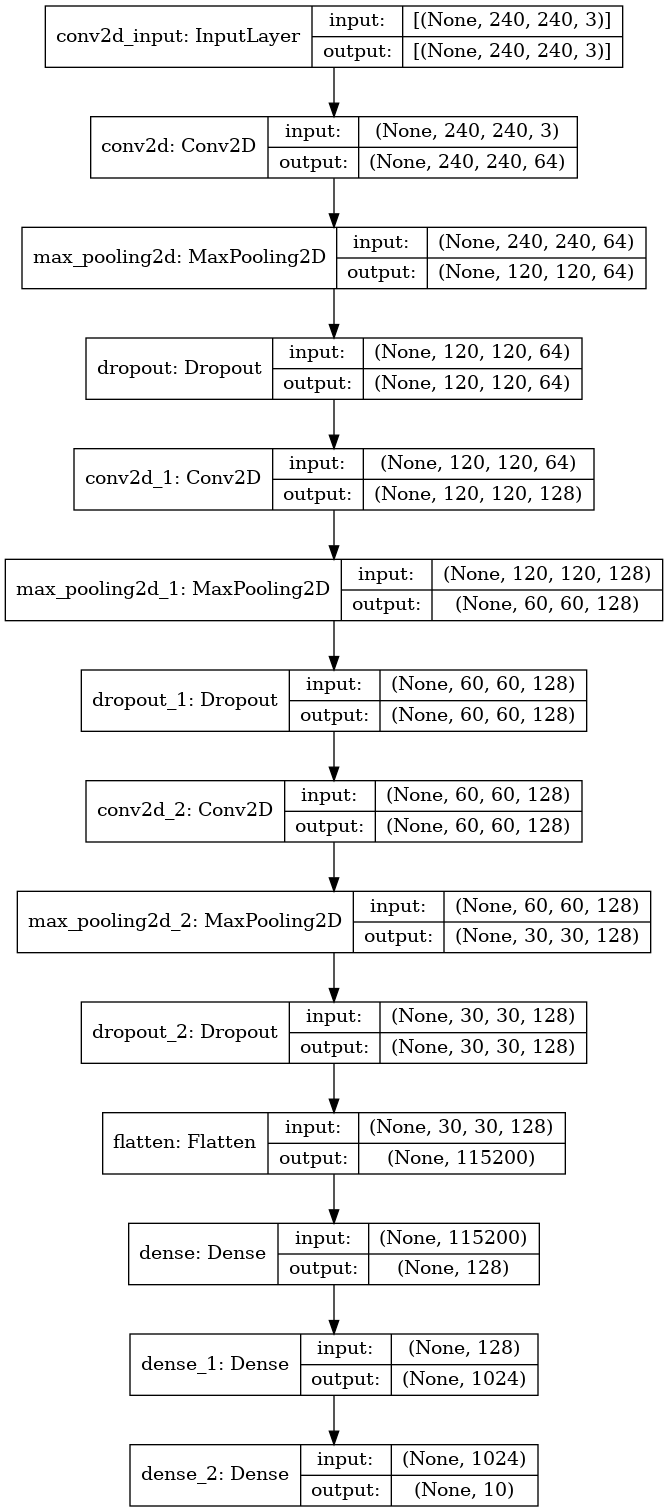

In [9]:
#plotting the model
from tensorflow.python.keras.utils.vis_utils import plot_model
plot_model(cnn, show_shapes = True)

In [10]:
#evaluating the result by calculating the accuracy on test data
cnn.evaluate(crossval_data)

5602/5602 [==============================] - 42s 7ms/step - loss: 0.0201 - accuracy: 0.9950


[0.020079251378774643, 0.9950017929077148]

Achieved an accuracy of 99.5% on test data